In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score


#Label Encoder
many columns have been changed to integer types in order to work with linear regression

In [36]:
df = pd.read_csv('/content/Housing.csv')
le = LabelEncoder()
df['mainroad']= le.fit_transform(df["mainroad"])
df['furnishingstatus'] = le.fit_transform(df["furnishingstatus"])
df['basement'] = le.fit_transform(df["basement"])
df['hotwaterheating'] = le.fit_transform(df["hotwaterheating"])
df['airconditioning'] = le.fit_transform(df["airconditioning"])
df['prefarea'] = le.fit_transform(df["prefarea"])
df['guestroom'] = le.fit_transform(df["guestroom"])


X= df.drop('price', axis=1).values
Y= df['price'].values


#EDA
Column Discernments

In [37]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [38]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


#Train test split
in order to control the test data given to the algorithm and see how it affects the results

In [41]:
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.2)

reg = LinearRegression()
reg.fit(train_x,train_y)

predictions = reg.predict(test_x)


# Validation
To validate how well this algorithm works , we show the first 5 sample results along with metrics such as test set size, mean average error etc..
the result below is with test_size =0.2

In [42]:
print("5 Predictions:")
for i in range(5):
    print(f"House {i+1}: Predicted ${predictions[i]:,.0f} | Actual ${test_y[i]:,.0f}")


mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)

print(f"Metrics ")
print(f"Test Set Size: {len(test_x)} houses")
print(f"Average Error (MAE): ${mae:,.0f}")
print(f"R² Score: {r2:.3f}")
print(f"Model Accuracy: {r2*100:.1f}%")

5 Predictions:
House 1: Predicted $4,874,379 | Actual $4,900,000
House 2: Predicted $3,903,672 | Actual $3,360,000
House 3: Predicted $3,932,568 | Actual $3,500,000
House 4: Predicted $5,308,765 | Actual $4,753,000
House 5: Predicted $5,439,139 | Actual $3,990,000
Metrics 
Test Set Size: 109 houses
Average Error (MAE): $631,934
R² Score: 0.759
Model Accuracy: 75.9%


# The result below is with test_size =0.9

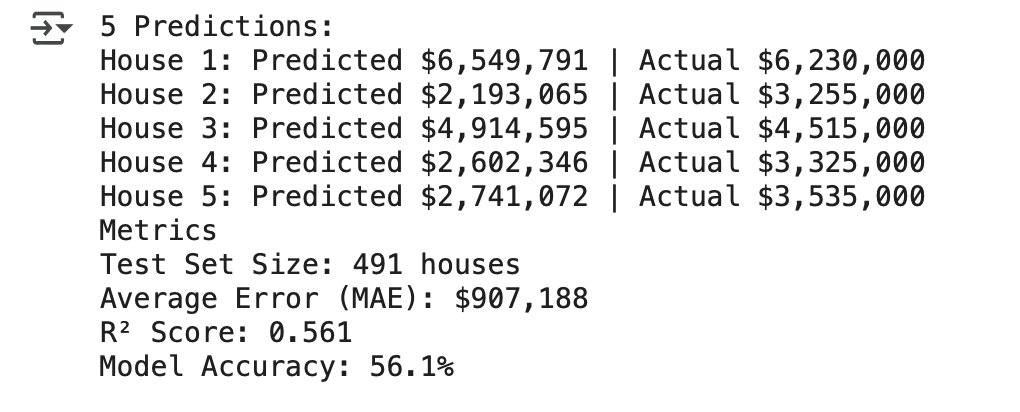